In [1]:
%load_ext autoreload
%autoreload 2
import terra
import numpy as np
from domino.data.gqa import split_gqa, read_gqa_dps,DATASET_DIR
from domino.slices.gqa import collect_rare_slices, TASKS, build_rare_slice
from domino.train import synthetic_score_slices
import seaborn as sns
import matplotlib.pyplot as plt
from meerkat.contrib.imagenet import *

/home/sabri/code/meerkat/meerkat/nn/__init__.py:7: ExperimentalWarning: The `meerkat.nn` module is experimental and has limited test coverage. Proceed with caution.
  warnings.warn(


In [2]:
from domino.evaluate import run_sdm, score_sdms

df = score_sdms.out().load()

In [3]:
df.iloc[df.reset_index().groupby(["run_sdm_run_id", "slice_idx"])['auroc'].idxmax().astype(int)]

,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,target_synset,run_sdm_run_id,slice
52,2,0,0.863613,0.0,0.04,0.04,0.040404,0.040404,0.070707,clothing.n.01,6788,bonnet.n.01
97,22,0,0.998577,1.0,0.96,0.79,0.442308,0.759615,0.932692,vehicle.n.01,6789,streetcar.n.01
2,2,0,0.999444,1.0,1.00,0.98,0.696078,0.960784,0.990196,bird.n.01,6790,great_grey_owl.n.01
27,2,0,0.948073,0.9,0.52,0.16,0.144231,0.153846,0.211538,vehicle.n.01,6791,snowplow.n.01
115,15,0,0.983899,0.0,0.00,0.01,0.000000,0.027027,0.108108,fish.n.01,6792,barracouta.n.01


In [12]:
inp = run_sdm.inp(run_id=6789, load=True)
data_dp, emb_dp = inp["data_dp"], inp["emb_dp"]
data_dp = data_dp.lz[data_dp["split"].isin(["valid", "test"])].merge(
    emb_dp[["image_id", "emb"]], on="image_id"
)

In [14]:
from sklearn.decomposition import PCA
x = data_dp.lz[data_dp["split"] == "valid"]["emb"].data
print("before")
PCA(n_components=128).fit_transform(x)

In [5]:
from domino.sdm import MixtureModelSDM, SpotlightSDM
sdm = MixtureModelSDM(
    n_slices=25, weight_y_log_likelihood=10, init_params="error"
)
sdm.fit(data_dp.lz[data_dp["split"] == "valid"])
dp = sdm.transform(data_dp.lz[data_dp["split"] == "test"])

 54%|█████▍    | 54/100 [00:07<00:06,  6.90it/s]


In [6]:
from domino.metrics import compute_sdm_metrics
slice_idx = 0
metrics_df = compute_sdm_metrics(dp)
metrics_df[metrics_df["slice_idx"] == slice_idx]

,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200
0,0,0,0.199849,0.0,0.00,0.00,0.00,0.000000,0.000000
1,1,0,0.388271,0.0,0.00,0.00,0.00,0.000000,0.000000
2,2,0,0.835038,0.0,0.00,0.00,0.00,0.000000,0.000000
3,3,0,0.793916,0.0,0.00,0.00,0.00,0.000000,0.000000
4,4,0,0.318885,0.0,0.00,0.00,0.00,0.000000,0.000000
5,5,0,0.180078,0.0,0.00,0.00,0.00,0.000000,0.000000
6,6,0,0.769039,0.0,0.00,0.00,0.00,0.000000,0.000000
7,7,0,0.770575,0.0,0.00,0.00,0.00,0.000000,0.000000
8,8,0,0.289586,0.0,0.00,0.00,0.00,0.000000,0.000000
9,9,0,0.220319,0.0,0.00,0.00,0.00,0.000000,0.000000


In [79]:
from domino.emb.clip import embed_words
from domino.explain import explain_slice

pred_slice_idx = 2
words_dp = embed_words.out(5143).load()
expl_dp = explain_slice(slice_dp=dp, words_dp=words_dp.lz[:int(1.1e4)], slice_idx=pred_slice_idx)
expl_dp.lz[(-expl_dp["score"]).argsort()[:10]]

,word (PandasSeriesColumn),score (NumpyArrayColumn),frequency (PandasSeriesColumn)
0,tramway,3.423828,14753
1,tram,3.423828,22803
2,stops,2.257812,42855
3,station,2.197266,1009305
4,platform,2.162109,148206
5,platforms,2.115234,62679
6,railway,2.066406,482401
7,street,2.035156,625041
8,leipzig,2.027344,21872
9,station's,2.003906,31028


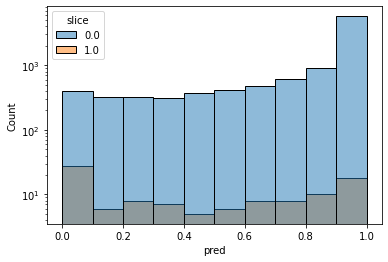

In [80]:
plot_df = pd.DataFrame(
    {"pred": dp["pred"], "slice": dp["slices"][:, slice_idx], "target": dp["target"]}
)
sns.histplot(
    data=plot_df[plot_df["target"] == 1],
    x="pred",
    hue="slice",
    stat="count",
    common_norm=not False,
    binwidth=0.1,
)
plt.yscale("log")


In [ ]:
dp.lz[dp["pred_slices"].data[:, pred_slice_idx].argsort()[-10:]]#[["object_image", "target", "slice"]]